In [80]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [81]:
df = pd.read_csv("spotify.csv")

In [82]:
df.shape

(440, 5)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [84]:
df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [85]:
#1 Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.

# check for null values
null_values = df.isnull().sum()
print("Null values in each column:\n", null_values)

# here drop all the duplicated values present in the spotify data frame
duplicate_rows  = df.duplicated().sum()
print("Number of duplicated rows:\n", duplicate_rows)

Null values in each column:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Number of duplicated rows:
 27


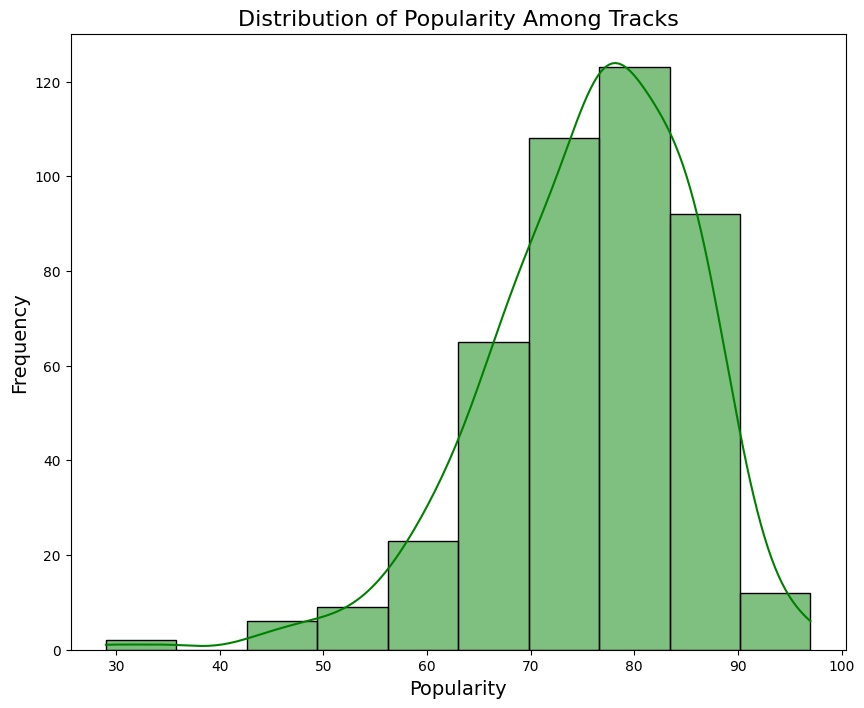

In [86]:
#2 What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram ?
df[["Track Name","Popularity"]]

plt.figure(figsize=(10, 8))
sns.histplot(df['Popularity'], bins=10, kde=True, color='g')
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Popularity Among Tracks', fontsize=16)
plt.show()

#The distibution of Popularity is right skewed>> most of the data lies on the right side 

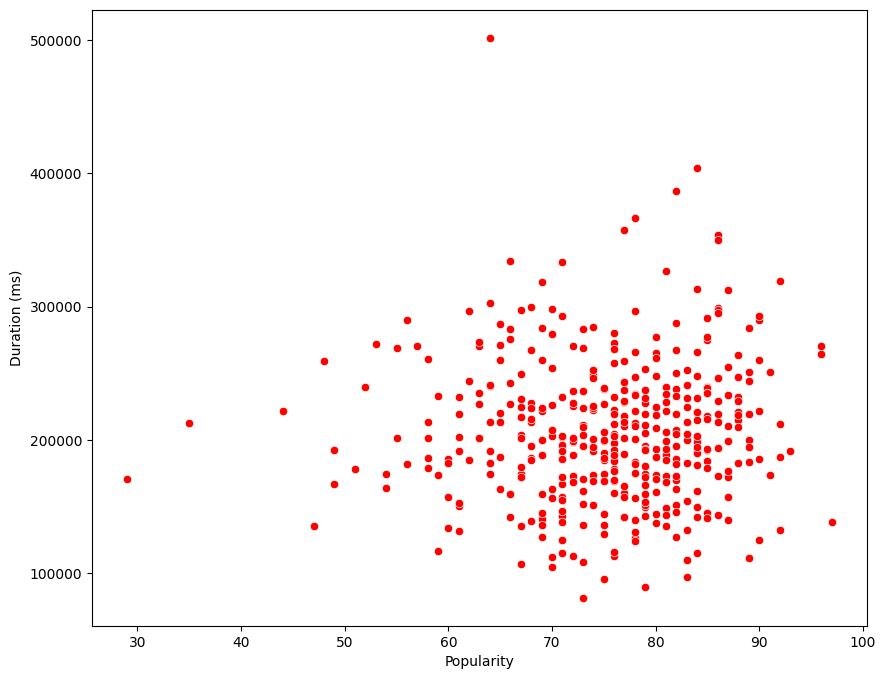

In [88]:
#3 Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

plt.figure(figsize = (10,8))
sns.scatterplot(x = "Popularity", y = "Duration (ms)", data = df, color = "r"
               )
plt.show()

#Most of the popularity of the song is in between 70 to 90 A numeric score reflecting the track's reception and appeal among Spotify listeners

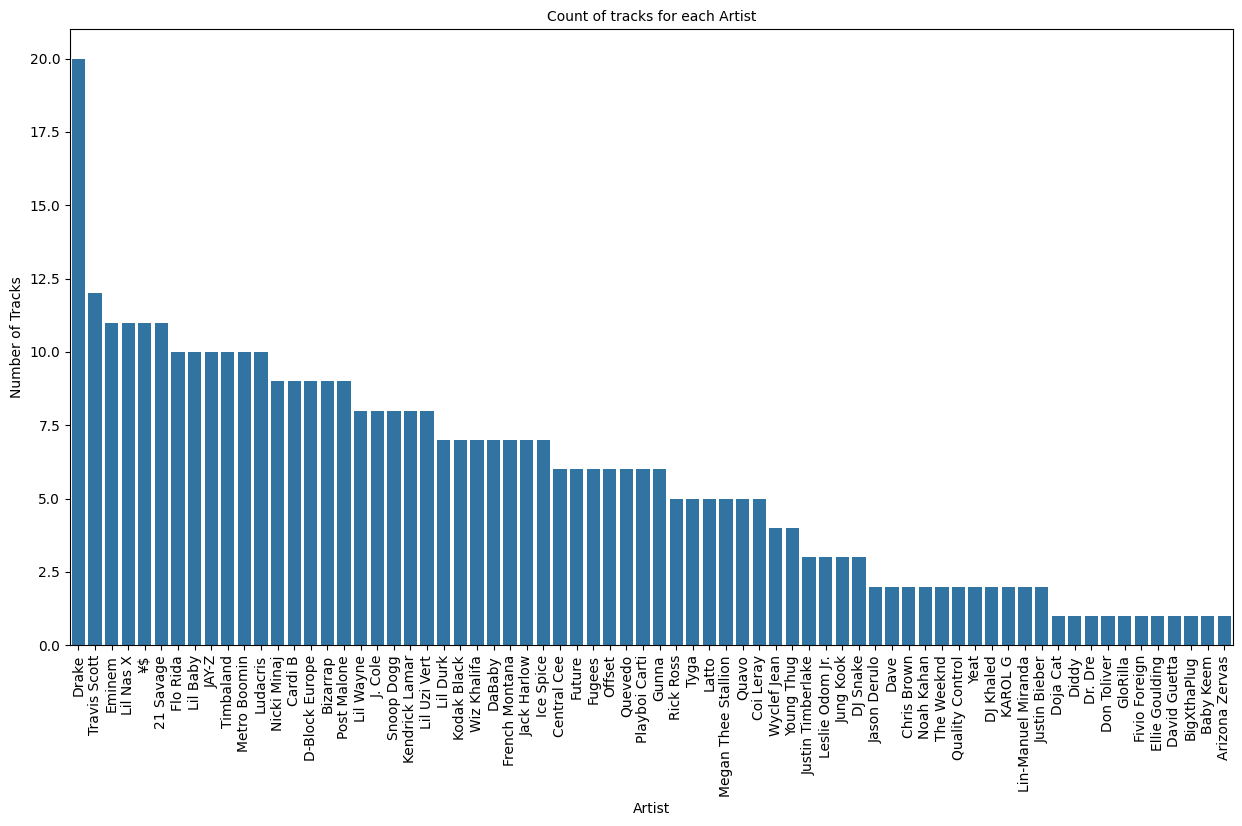

In [89]:
#4 Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot


# Groupby of each artist by their Track name
artist_by_count = df.groupby("Artist")["Track Name"].count()


#top 50 artist by their track
top_50_artist = artist_by_count.sort_values(ascending = False).head(70)


plt.figure(figsize = (15,8))
sns.countplot(x = df["Artist"], order = top_50_artist.index)
plt.title("Count of tracks for each Artist", fontsize = 10)
plt.ylabel("Number of Tracks")
plt.xlabel("Artist")
plt.xticks(rotation = 90)
plt.show()

# Insight >> Drake is the highest number of tracks 17.

In [90]:
#5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

track_by_count = df.groupby("Track Name")["Artist"].count()

# top 5 least popular tracks
least_5_tracks = track_by_count.sort_values(ascending = True).head(5)

# Merge with the original DataFrame to get artist name
least_5tracks_df = df[df["Track Name"].isin(least_5_tracks.index)][["Artist", "Track Name"]].drop_duplicates()
print("Least 5 track in the dataset are: ")
print(least_5tracks_df)

Least 5 track in the dataset are: 
             Artist                                 Track Name
26         Jessie J                                  Bang Bang
44      Jack Harlow                                Tyler Herro
146  D-Block Europe                                        UFO
187            Dave                                     UK Rap
217    XXXTENTACION  Arms Around You (feat. Maluma & Swae Lee)


In [92]:
#6 Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.

# Group by artist and calculate the average popularity
average_popularity = df.groupby("Artist")["Popularity"].mean()

# Sort the artist by average popularity in descending order
sorted_popularity = average_popularity.sort_values(ascending = False)

# Display the top 5 most popular artists and their average popularity
top_5_artist = sorted_popularity.head(5)

print("Top 5 most popular artists and their average popularity:\n", top_5_artists)

# Find the artist with the highest average popularity
most_popular_artist = top_5_artist.idxmax()
highest_average_popularity = top_5_artists.max()

print(f"The artist with the highest average popularity is {most_popular_artist} with an average population of {highest_average_popularity}.")

Top 5 most popular artists and their average popularity:
 Index(['cassö', 'Trueno', 'David Guetta', 'Travis Scott', '¥$'], dtype='object', name='Artist')
The artist with the highest average popularity is cassö with an average population of ¥$.


In [94]:
#7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

# Most popular tracks of top 5 most popular artists
# Find the most popular track for each of the top 5 artists
most_popular_tracks = {}
for artist in top_5_artists:
    artist_tracks = df[df['Artist'] == artist]
    most_popular_track = artist_tracks.loc[artist_tracks['Popularity'].idxmax()]['Track Name']
    most_popular_tracks[artist] = most_popular_track

# Display the most popular tracks for the top 5 artists
for artist, track in most_popular_tracks.items():
    print(f"The most popular track for {artist} is '{track}'.")



The most popular track for cassö is 'Prada'.
The most popular track for Trueno is 'Mamichula - con Nicki Nicole'.
The most popular track for David Guetta is 'Baby Don't Hurt Me'.
The most popular track for Travis Scott is 'FE!N (feat. Playboi Carti)'.
The most popular track for ¥$ is 'CARNIVAL'.


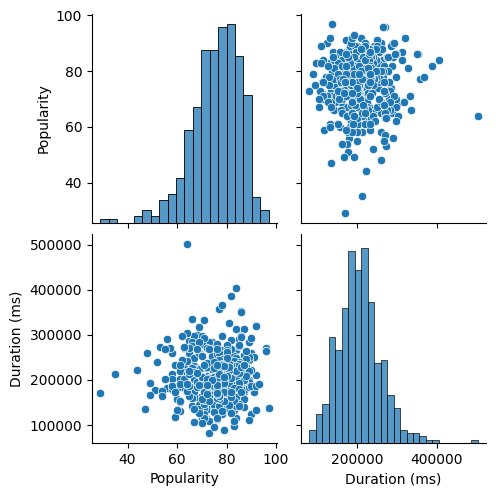

In [103]:
#8 Visualize relationships between multiple numerical variables simultaneously using a pair plot.


columns_pair_plot = ["Popularity","Duration (ms)"]
sns.pairplot(df[columns_pair_plot])
plt.show()

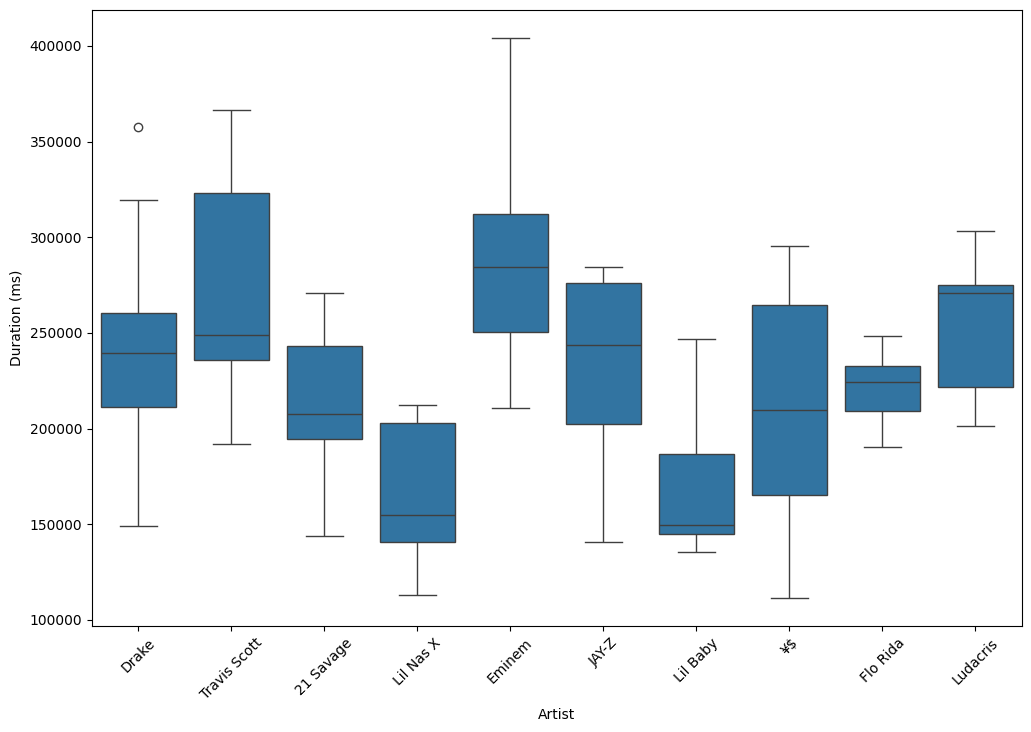

In [125]:
#9 Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot

# Here artist name is too much we can visulaize only ten artist.

top_artist = df["Artist"].value_counts().head(10).index
filtered_df = df[df["Artist"].isin(top_artist)]

plt.figure(figsize=(12,8)) 
sns.boxplot(y="Duration (ms)", x="Artist", data=filtered_df)
plt.xticks(rotation=45)
plt.show()

# insight >> Many of the outlier are present means track some track duration time is more than average.

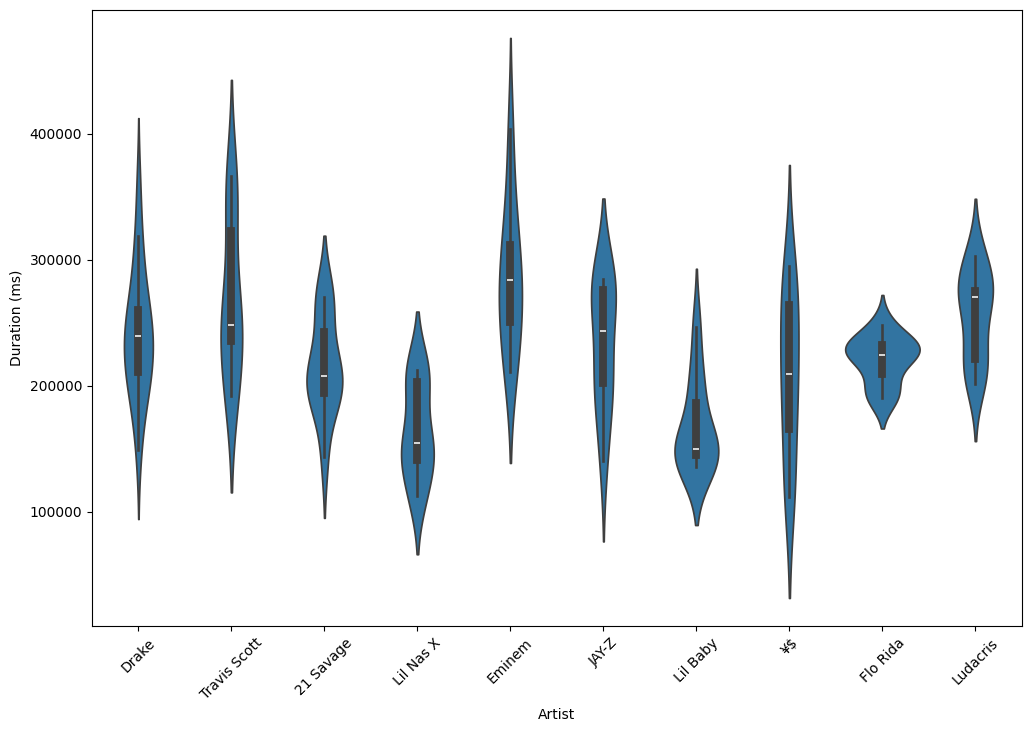

In [127]:
plt.figure(figsize=(12,8)) 
sns.violinplot(y="Duration (ms)", x="Artist", data=filtered_df)
plt.xticks(rotation=45)
plt.show()

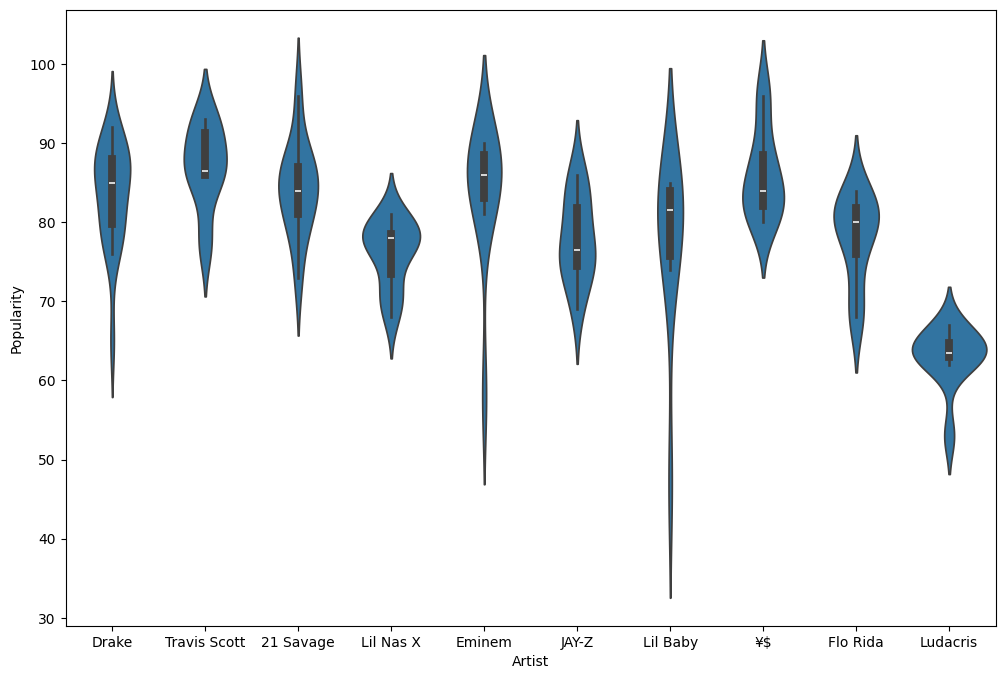

In [131]:
#10.  How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

plt.figure(figsize = (12,8))
sns.violinplot(y = "Popularity", x = "Artist", data = filtered_df)
plt.show()

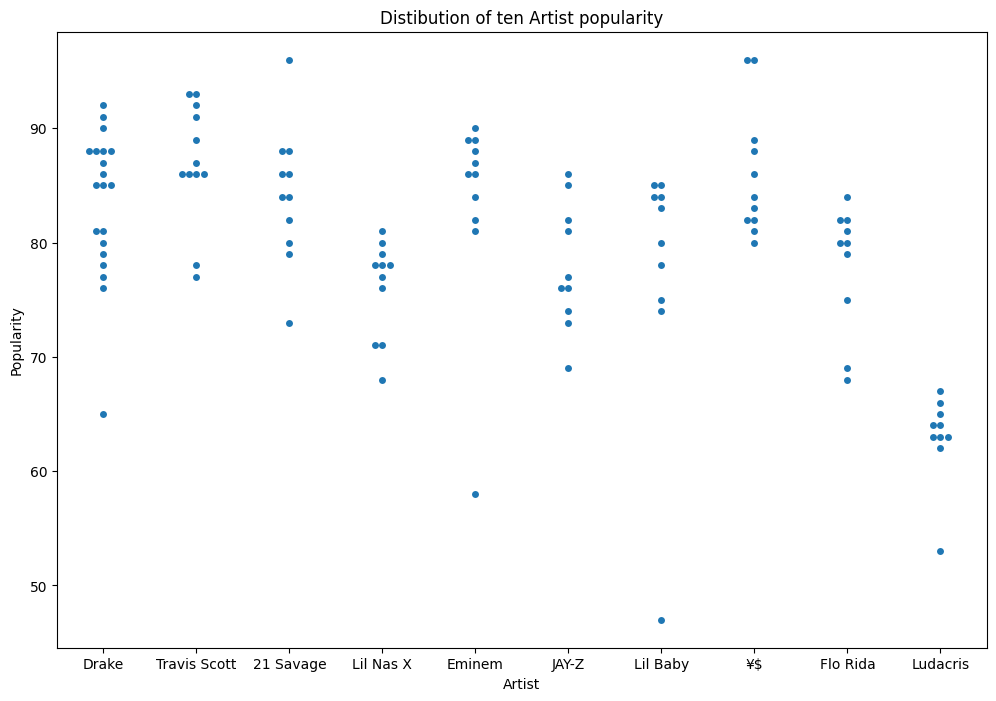

In [134]:
plt.figure(figsize = (12,8))
sns.swarmplot(y = "Popularity", x = "Artist", data = filtered_df)
plt.title("Distibution of ten Artist popularity")
plt.show()
# Insight >> Some of the artist is more popular than average